In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
condata = pd.read_csv(r'C:\Users\premf\OneDrive\Documents\AIML\Lab Exercise\Project Featurization\concrete.csv')

In [4]:
condata.shape

(1030, 9)

# Univariate analysis

In [5]:
condata.head()
#Below could see 0's in slag, ash and superplastic on the first five records. There could be more on the other columns.
#Have to check if they are relevant or have to be replaced by Mean or Median

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
condata.describe()
# Count of the all columns is 1030 which means there is no missing value

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# Additional step to confirm there is no null values and result confirms the same
condata.isnull().values.any()

False

In [8]:
condata.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [9]:
condata.isin([0]).any().any()
# As the water, cement and age cannot be zero lets check if there are any zero values in it
condata.isin(['cement']).any().any()

False

In [10]:
condata.isin(['water']).any().any(),condata.isin(['age']).any().any(),condata.isin(['coarseagg']).any().any(), condata.isin(['fineagg']).any().any()
# There is no zero in the mandatory data however add ons like slag, ash and supoerplastic can be zero

(False, False, False, False)

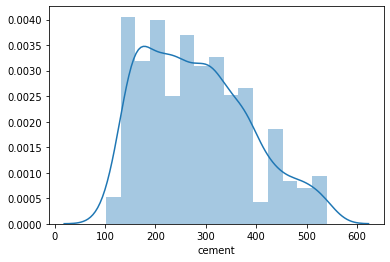

In [11]:
#Looks like a good gaussian curve though not perfect and doesnt seems like any outliers
sns.distplot(condata['cement'])

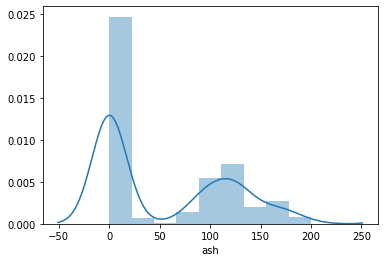

In [12]:
# Has multiple valley and peaks and looks like many of the concrete doesnt have ash added to it,
sns.distplot(condata['ash'])

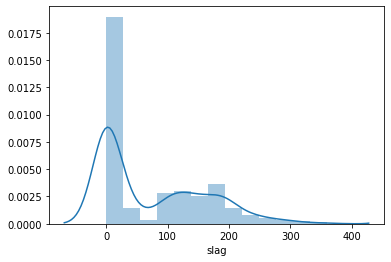

In [13]:
# Has multiple valley and peaks and looks like many of the concrete doesnt have slag added to it
sns.distplot(condata['slag'])

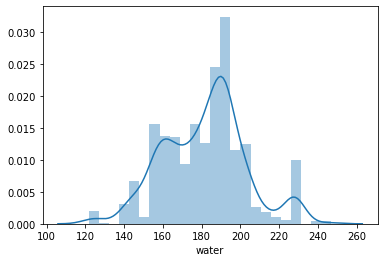

In [14]:
# Has multiple peaks and valleys and seems there are some exterme values at 120 and 240. have to validate in bivariate whether it plays a role in detemining strength
sns.distplot(condata['water'])

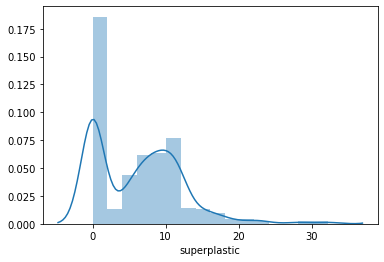

In [15]:
# Same as ash and slag many concrete doesnt have superplastic
sns.distplot(condata['superplastic'])

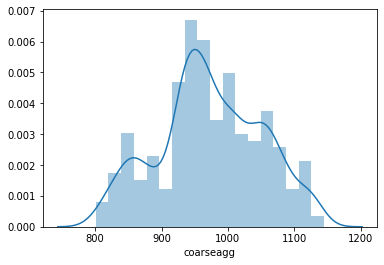

In [16]:
# looks good even though even though its not a perfect gaussian curve as values are not eually distributed and no outliers
sns.distplot(condata['coarseagg'])

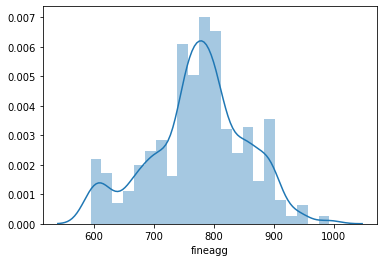

In [17]:
# Doesnt seems like an outliers the one close to 1000 however when using the bivariate will determine
sns.distplot(condata['fineagg'])

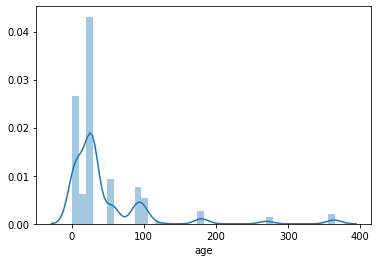

In [18]:
# Most of the data remain between 0 and 100 howver there are exterme values close to 100, 200 and 400.
# Have to determine if the extreme values have a corrleation to the other data
sns.distplot(condata['age'])

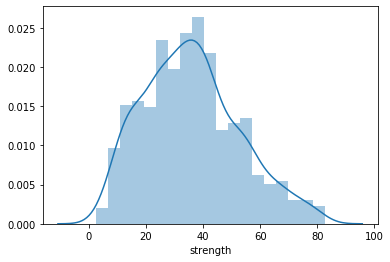

In [19]:
# Looks like a good gaussian curve
sns.distplot(condata['strength'])

# Multivariate Analysis 

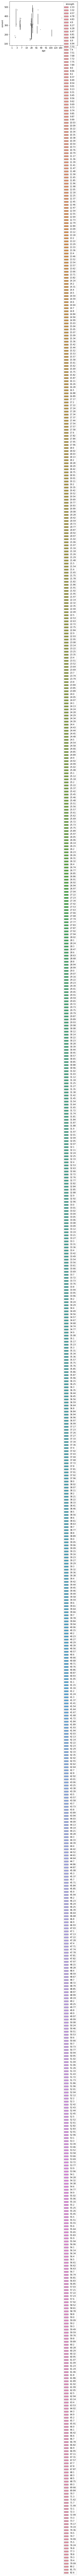

In [20]:
#As not like classification its very difficult to interpret as its the target is regression value however its evident the data is widely spread
#and see however the age 180 looks like an outlier
sns.boxplot(condata['age'], condata['cement'], hue=condata['strength'])

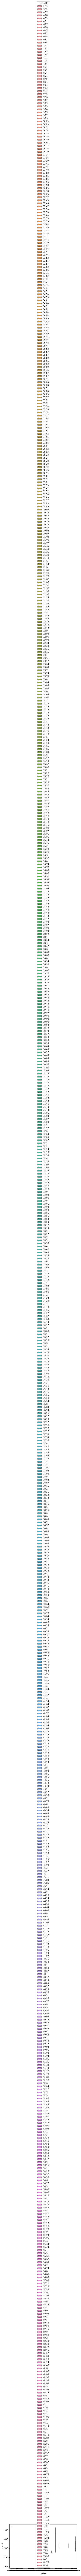

In [21]:
# Same as like the other boxplot
sns.boxplot(condata['water'], condata['cement'], hue=condata['strength'])

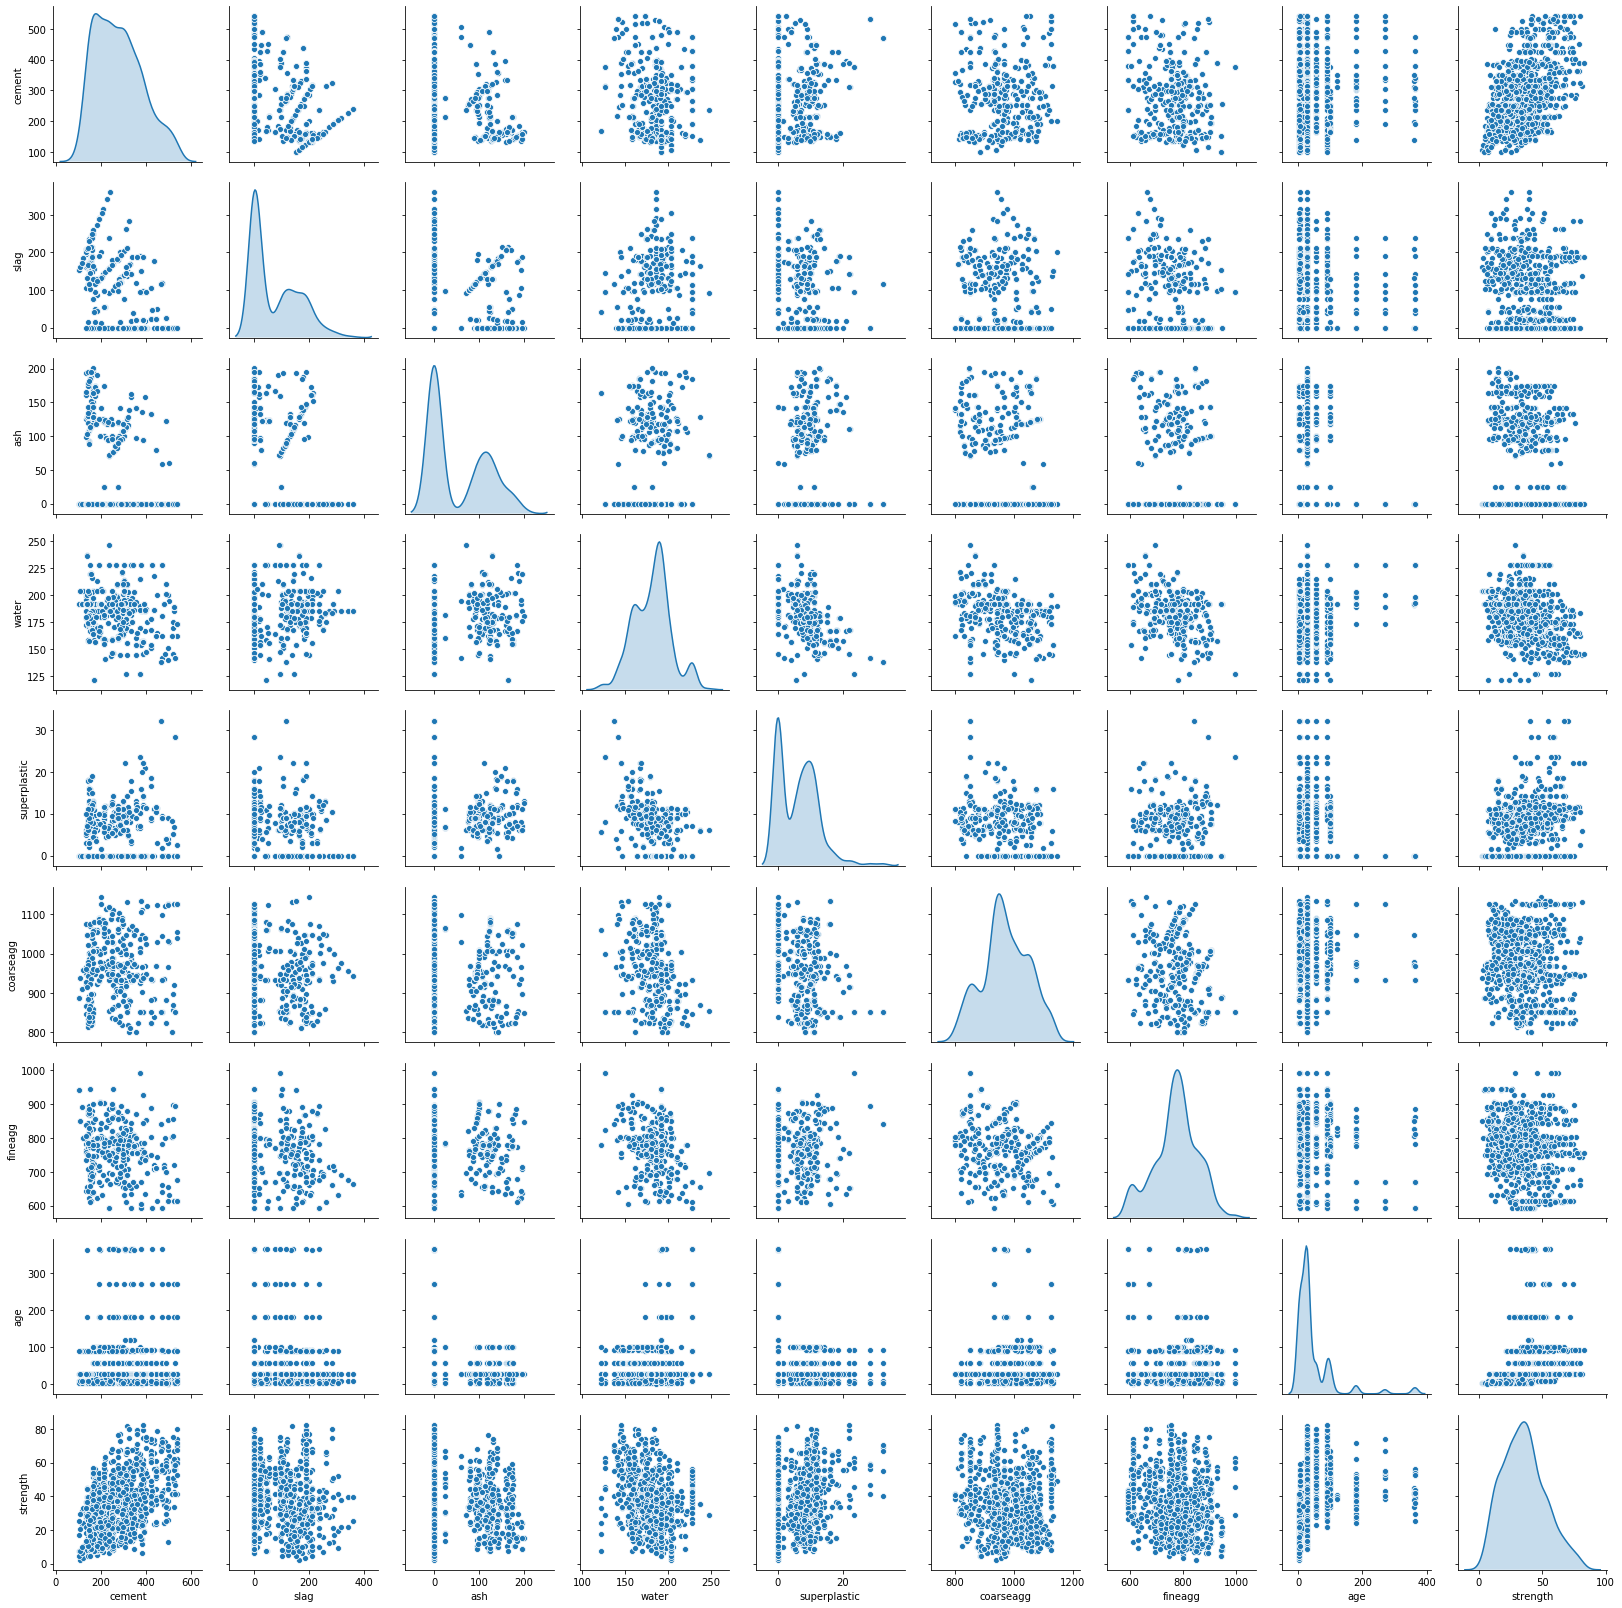

In [22]:
#Lets Futher check the data using pairplot 
sns.pairplot(condata,diag_kind="kde")
# From below Cement and Strength looks more a strong linear relationship
# Age doesnt influence much on the strength of the concerte
# Superplastic seems to influence the strength in a linearway 
# Water seem to be the negative influencer to some extent as adding more water to cements reducing the strength 

In [23]:
#Lets also check the relationship using corelation
condata.corr()
#Cement has postive corrleation with Strength and superplastic which was also evident from pairplot
#Slag, superplastic, age and cement are postive influences on the strength, the age was not very evident as a postive influencer
# from the pairplot but by coorleation and its evident water is a negative influencer to strength 

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [24]:
def plot_corr(df, size=40):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

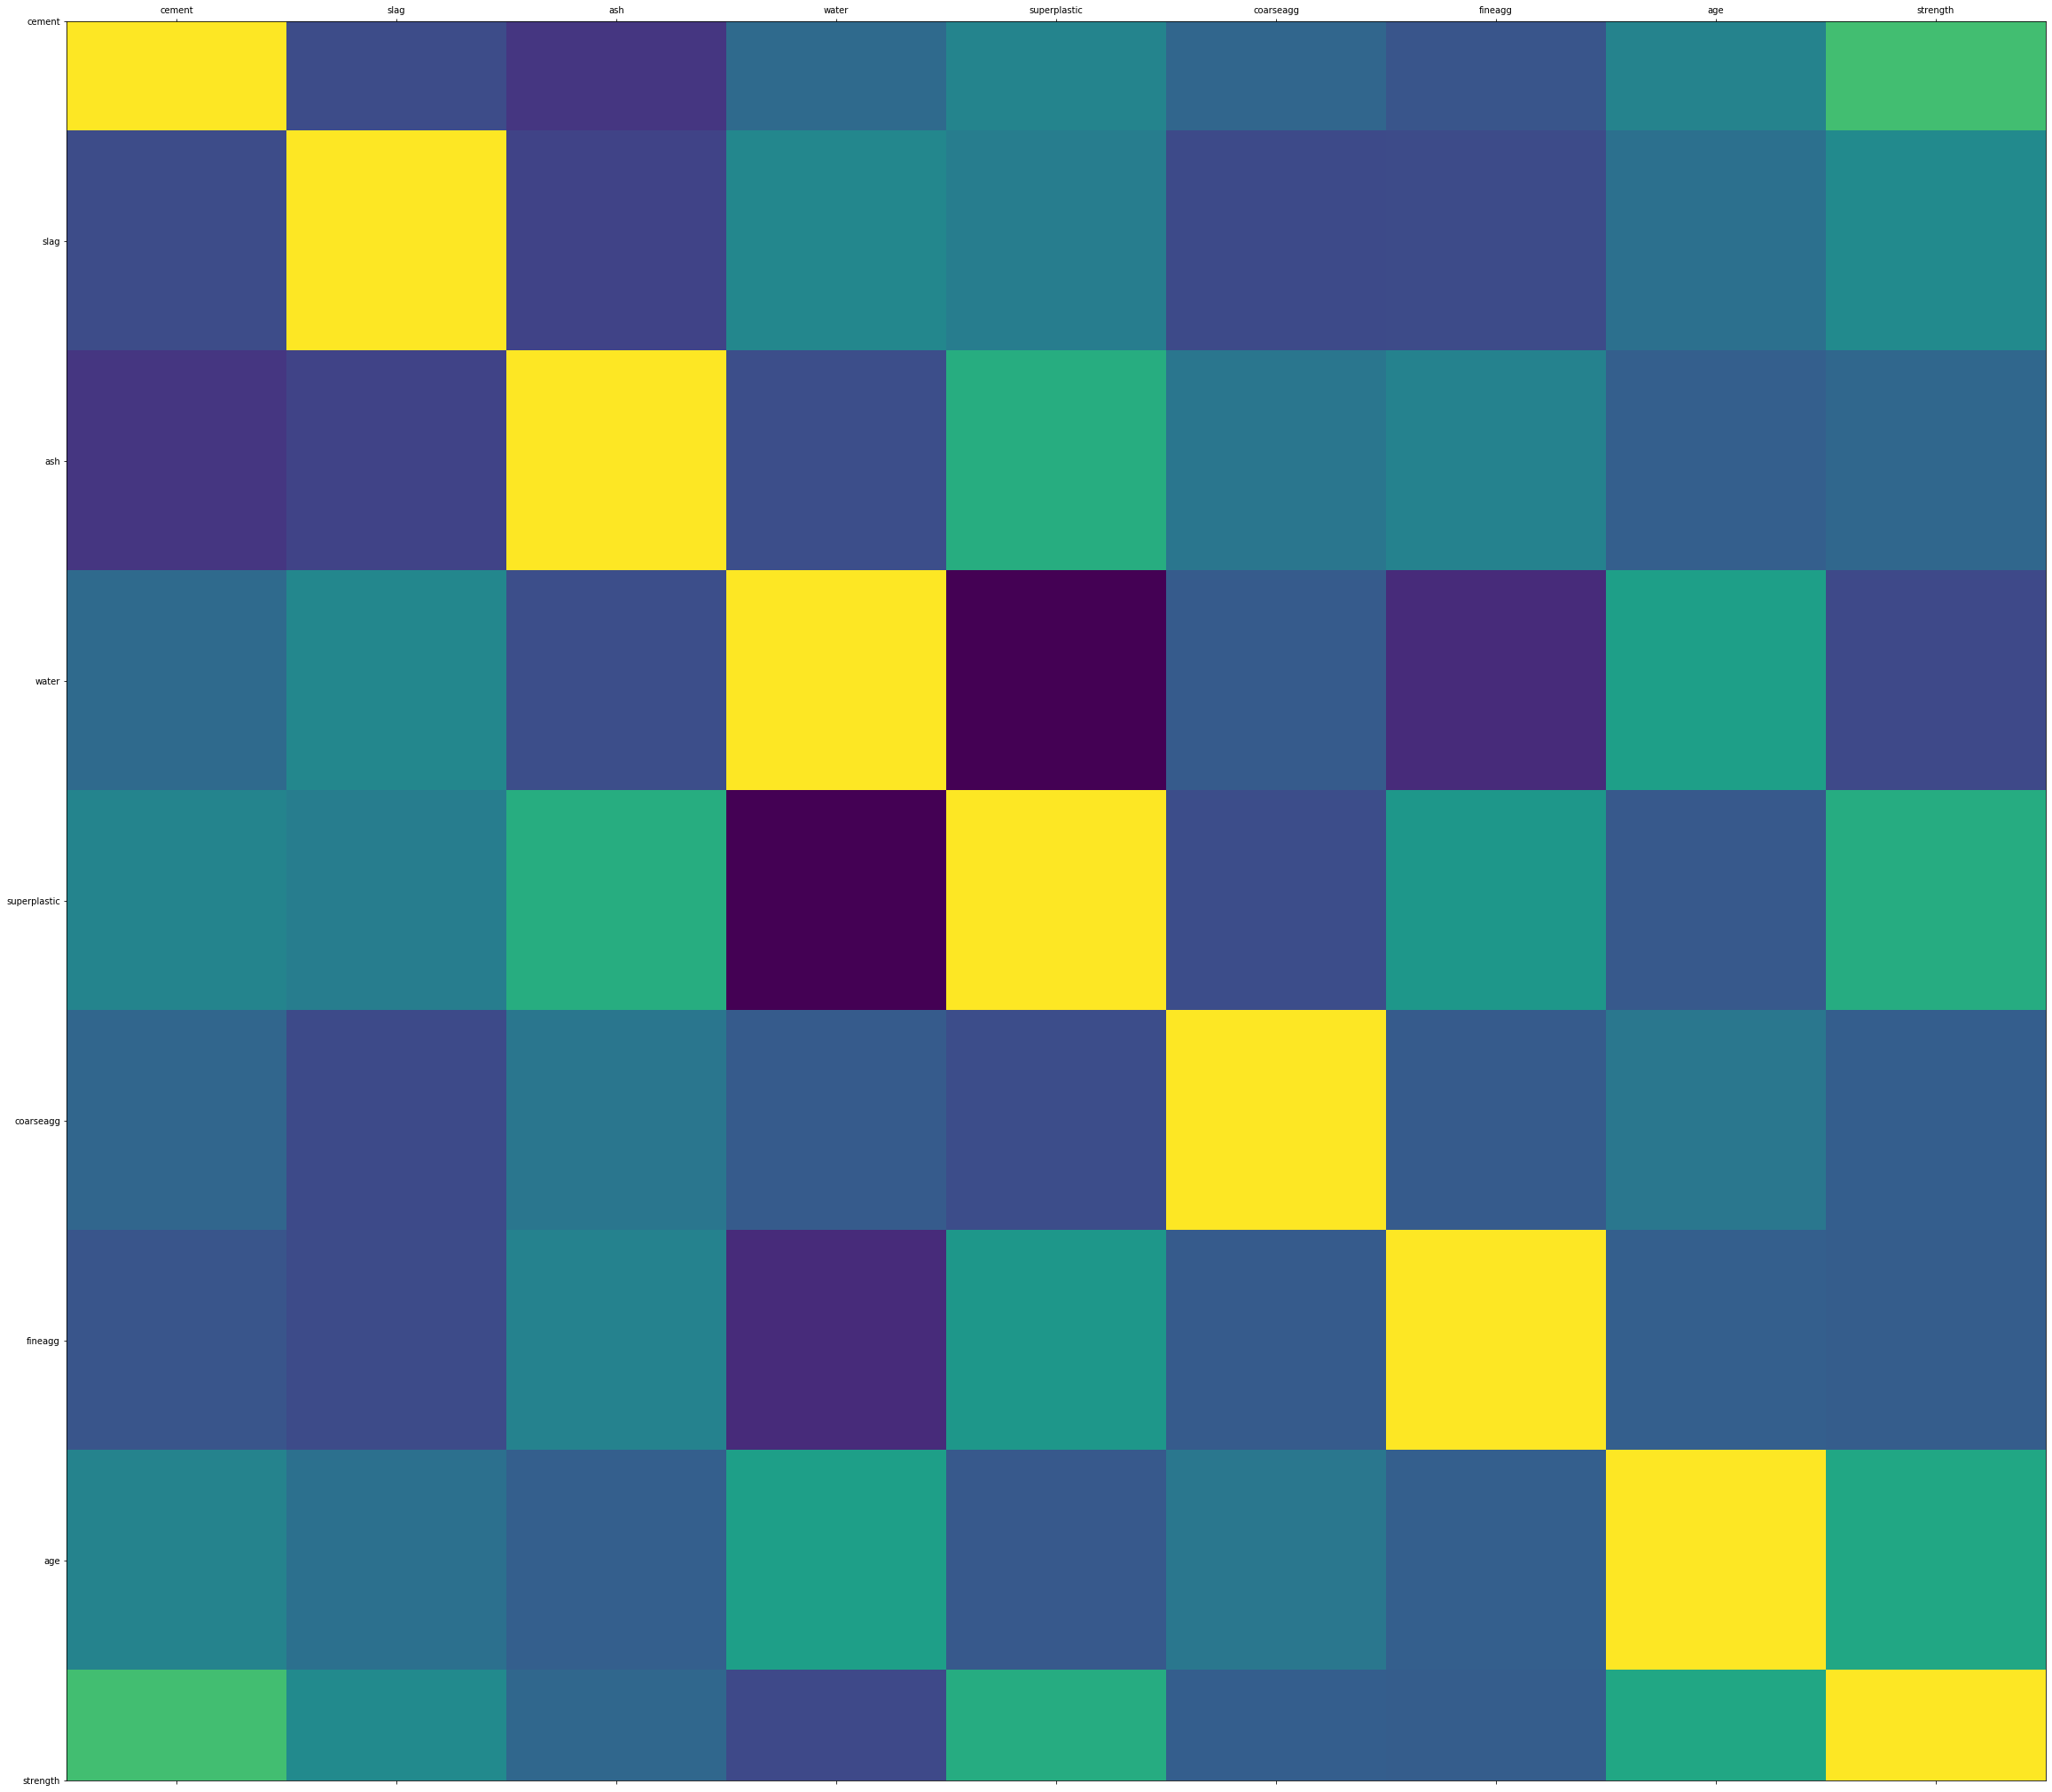

In [25]:
plot_corr(condata)
# As there is no negligible influencer there is no column being dropped so all elements are taken for modelling

# Feature Engineering

In [26]:
#From the above observations, We are going to check if there are any outliers in water and age and replace with median value
#We will validate with mean + 2 standard deviations and then replace with median value
cut_off_age = (condata['age'].mean()) + (2*condata['age'].std())
print(cut_off_age)
median_age = condata['age'].median()
print(median_age)
std_dev_two = 2*condata['age'].std()
print(std_dev_two)

172.00195908439568
28.0
126.33982316206558


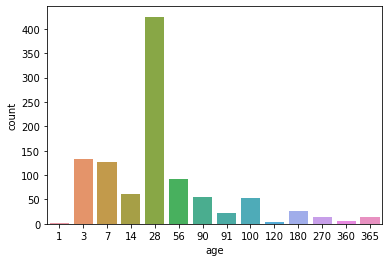

In [27]:
sns.countplot(condata['age'])

In [28]:
#Going to replace the values behind the cut off by cut off value as part of capping. As the count of data is less outside the cutoff
#it should not affect the gaussian curve much even there can be a small peak at the end of the curve
condata['age'] = np.where(condata['age'] >cut_off_age, cut_off_age,condata['age'])
condata['age'].median()

28.0

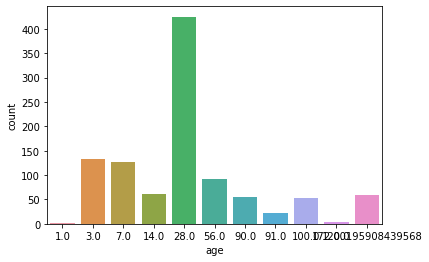

In [29]:
sns.countplot(condata['age'])

In [30]:
condata['age'].max()

172.00195908439568

In [31]:
#Lets peform the same exercise for water
cut_off_water = (condata['water'].mean()) + (2*condata['water'].std())
print(cut_off_water)
median_water = condata['water'].median()
print(median_water)
std_dev_water_two = 2*condata['water'].std()
print(std_dev_water_two)

224.27571868346288
185.0
42.7084371300649


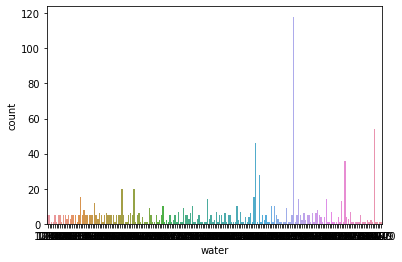

In [32]:
sns.countplot(condata['water'])

In [33]:
#Going to replace the values behind the cut off by cut off value as part of capping. As the count of data is less outside the cutoff
#it should not affect the gaussian curve much even there can be a small peak at the end of the curve
condata['water'] = np.where(condata['water'] >cut_off_water, cut_off_water,condata['water'])
condata['water'].median()

185.0

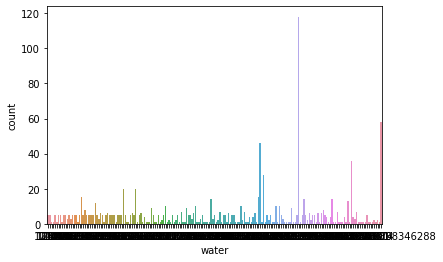

In [34]:
sns.countplot(condata['water'])

In [35]:
#Splitting the dependent and independent valriables
X= condata.drop(['strength'],axis=1)
Y = condata['strength']

In [36]:
#Scale all the data in X 
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [37]:
#Extending the features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [ ]:
# We will be using 3 models 1. Linear Regression 2. Decision Tree Regression and 3. SVM 

# Model Building

In [38]:
# Linear Regression Model 
lr_reg_model = LinearRegression()
lr_reg_model.fit(X_train, Y_train)
print(lr_reg_model.score(X_train, Y_train))
print(lr_reg_model.score(X_test,Y_test))

0.7878839977352822
0.7589017964815041


In [39]:
#Ridge Regression Model
rdg_reg_model = Ridge(alpha=0.2)
rdg_reg_model.fit(X_train, Y_train)
print(rdg_reg_model.score(X_train, Y_train))
print(rdg_reg_model.score(X_test, Y_test))

0.7878804190691846
0.7589349481546702


In [40]:
#Lasso Regression Model
laso_reg_model = Lasso(alpha=0.2)
laso_reg_model.fit(X_train, Y_train)
print(laso_reg_model.score(X_train, Y_train))
print(laso_reg_model.score(X_test, Y_test))

0.77289179145347
0.7447706210073594


In [41]:
#Lets do a cross validation on the above linear regression models, K=10(the recommended value)
num_folds = 10 
seed = 7 
kfold = KFold(n_splits=num_folds, random_state=seed)
lr_reg_result = cross_val_score(lr_reg_model, X, Y, cv=kfold)
print("Accuracy : %.3f%% (%.3f%%)"%(lr_reg_result.mean()*100.0, lr_reg_result.std()*100.0))

Accuracy : 67.303% (6.311%)


In [42]:
#Lets do a cross validation on the above linear regression models, K=10(k=sqrt(n))
num_folds = 32 
seed = 7 
kfold2 = KFold(n_splits=num_folds, random_state=seed)
lr_reg_result2 = cross_val_score(lr_reg_model, X_poly, Y, cv=kfold2)
print("Accuracy : %.3f%% (%.3f%%)"%(lr_reg_result2.mean()*100.0, lr_reg_result2.std()*100.0))

Accuracy : 74.335% (7.395%)


In [43]:
#As accuracy of k=10 is better and its usually recommended values lets apply it across the ridge and lasso model

#Lets do a cross validation on the above ridge models, K=10(k=sqrt(n))
rdg_result = cross_val_score(rdg_reg_model, X_poly, Y, cv=kfold)
print("Accuracy : %.3f%% (%.3f%%)"%(rdg_result.mean()*100.0, rdg_result.std()*100.0))

Accuracy : 75.187% (4.933%)


In [44]:
#Lets do a cross validation on the above lasso models, K=10(k=sqrt(n))

lasso_result = cross_val_score(laso_reg_model, X_poly, Y, cv=kfold)
print("Accuracy : %.3f%% (%.3f%%)"%(lasso_result.mean()*100.0, lasso_result.std()*100.0))

Accuracy : 73.766% (5.461%)


In [45]:
#SVM Model 
SVM_Model = SVR(kernel='rbf', gamma='auto')
SVM_Model.fit(X_train, Y_train)
print(SVM_Model.score(X_train, Y_train))
print(SVM_Model.score(X_test, Y_test))

0.5311290451524515
0.5338649234795323


In [46]:
#Implement cross validation on SVR
SVR_result = cross_val_score(SVM_Model, X_poly, Y, cv=kfold)
print("Accuracy : %.3f%% (%.3f%%)"%(SVR_result.mean()*100.0, SVR_result.std()*100.0))

Accuracy : 55.284% (4.561%)


In [47]:
#Building decision Tree model using Gini Impurity 
dtree_model = DecisionTreeRegressor(random_state = 1)
dtree_model.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [48]:
print(dtree_model.score(X_train, Y_train))
print(dtree_model.score(X_test, Y_test))

0.9946752996414926
0.8009924290048119


In [49]:
#Implement cross validation on decision tree
dtree_result = cross_val_score(dtree_model, X_poly, Y, cv=kfold)
print("Accuracy : %.3f%% (%.3f%%)"%(dtree_result.mean()*100.0, dtree_result.std()*100.0))

Accuracy : 83.077% (3.826%)


# HyperParameter Tuning

In [ ]:
# We are going to hyperparameter Tuning using GridSearchCV and RandomSearchCV on lasso, SVR and decisionTree and take two best model out of it 

# Hyperparameter tuning for lasso

In [50]:
laso_reg_model.get_params()

{'alpha': 0.2,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [51]:
#lasso GridSearch CV
param_grid_lasso = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 0.035, 0.04, 0.05, 0.065, 0.077]}
ls_gs = GridSearchCV(laso_reg_model,param_grid_lasso, cv=10)

In [52]:
ls_gs.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=0.2, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.02, 0.024, 0.025, 0.026, 0.03, 0.035, 0.04,
                                   0.05, 0.065, 0.077]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
ls_gs.best_params_

{'alpha': 0.065}

In [54]:
ls_gs.cv_results_['params']

[{'alpha': 0.02},
 {'alpha': 0.024},
 {'alpha': 0.025},
 {'alpha': 0.026},
 {'alpha': 0.03},
 {'alpha': 0.035},
 {'alpha': 0.04},
 {'alpha': 0.05},
 {'alpha': 0.065},
 {'alpha': 0.077}]

In [55]:
ls_gs.cv_results_['mean_test_score']

array([0.75149672, 0.75153675, 0.75155152, 0.75157497, 0.75171634,
       0.75186915, 0.75201383, 0.75232485, 0.75235356, 0.75216746])

In [56]:
#Best score out of lasso using Gridsearch
ls_gs.best_score_

0.752353564678518

In [57]:
#lasso RandomSearch CV
ls_rs = RandomizedSearchCV(laso_reg_model,param_grid_lasso, cv=10)

In [58]:
ls_rs.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Lasso(alpha=0.2, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [0.02, 0.024, 0.025, 0.026,
                                                  0.03, 0.035, 0.04, 0.05,
                                                  0.065, 0.077]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [59]:
ls_rs.best_params_

{'alpha': 0.065}

In [60]:
ls_rs.cv_results_['params']

[{'alpha': 0.02},
 {'alpha': 0.024},
 {'alpha': 0.025},
 {'alpha': 0.026},
 {'alpha': 0.03},
 {'alpha': 0.035},
 {'alpha': 0.04},
 {'alpha': 0.05},
 {'alpha': 0.065},
 {'alpha': 0.077}]

In [61]:
ls_rs.cv_results_['mean_test_score']

array([0.75149672, 0.75153675, 0.75155152, 0.75157497, 0.75171634,
       0.75186915, 0.75201383, 0.75232485, 0.75235356, 0.75216746])

In [62]:
#Best score out of lasso using randomizedsearch is 70
ls_rs.best_score_

0.752353564678518

# HyperParameter tuning for SVM

In [63]:
SVM_Model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [67]:
SVM_params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}

In [68]:
svm_mdl = GridSearchCV(SVM_Model,SVM_params, cv=10)

In [69]:
svm_mdl.fit(X_train, Y_train)

C:\Users\premf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
svm_mdl.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [71]:
svm_mdl.cv_results_['params']

[{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}]

In [72]:
#Best accuracy score for SVR model
svm_mdl.best_score_

0.8539974795193691

In [73]:
svm_mdl.cv_results_['mean_test_score']

array([-0.0127249 ,  0.04514462,  0.06200617, -0.00440948,  0.05364075,
        0.34847811,  0.39419441,  0.10354964,  0.34567639,  0.70989473,
        0.78284046,  0.48733691,  0.45685393,  0.79462743,  0.85399748,
        0.77729932])

In [74]:
#Implementing SVM on RandomizedSearch CV
svm_mdl_rs = RandomizedSearchCV(SVM_Model,SVM_params, cv=10)

In [75]:
svm_mdl_rs.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [76]:
svm_mdl_rs.best_params_

{'kernel': 'rbf', 'gamma': 0.01, 'C': 100}

In [77]:
svm_mdl_rs.cv_results_['params']

[{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1},
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 10},
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.1},
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 100},
 {'kernel': 'rbf', 'gamma': 1, 'C': 0.1},
 {'kernel': 'rbf', 'gamma': 0.1, 'C': 1},
 {'kernel': 'rbf', 'gamma': 0.1, 'C': 10},
 {'kernel': 'rbf', 'gamma': 0.01, 'C': 1},
 {'kernel': 'rbf', 'gamma': 0.001, 'C': 100},
 {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}]

In [78]:
svm_mdl_rs.best_score_

0.8539974795193691

In [79]:
svm_mdl_rs.cv_results_['mean_test_score']

array([ 0.04514462,  0.78284046,  0.06200617,  0.85399748, -0.0127249 ,
        0.34847811,  0.70989473,  0.39419441,  0.77729932,  0.79462743])

# Hyperparameter tuning for Decision Tree

In [80]:
dtree_model.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

In [220]:
dtree_grid = {'max_depth': range(2,30,2),
              'min_samples_split': range(2,30,2)}

In [212]:
dtree_mdl = GridSearchCV(dtree_model, 
                   dtree_grid,
                   cv=10 , n_jobs=1, verbose=1)

In [213]:
dtree_mdl.fit(X_train, Y_train)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1960 out of 1960 | elapsed:   40.4s finished
C:\Users\premf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=1,
             param_grid={'max_depth': range(2, 30, 2),
                         'min_samples_split': range(2, 30, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=N

In [214]:
dtree_mdl.best_params_

{'max_depth': 10, 'min_samples_split': 2}

In [215]:
dtree_mdl.cv_results_['params']

[{'max_depth': 2, 'min_samples_split': 2},
 {'max_depth': 2, 'min_samples_split': 4},
 {'max_depth': 2, 'min_samples_split': 6},
 {'max_depth': 2, 'min_samples_split': 8},
 {'max_depth': 2, 'min_samples_split': 10},
 {'max_depth': 2, 'min_samples_split': 12},
 {'max_depth': 2, 'min_samples_split': 14},
 {'max_depth': 2, 'min_samples_split': 16},
 {'max_depth': 2, 'min_samples_split': 18},
 {'max_depth': 2, 'min_samples_split': 20},
 {'max_depth': 2, 'min_samples_split': 22},
 {'max_depth': 2, 'min_samples_split': 24},
 {'max_depth': 2, 'min_samples_split': 26},
 {'max_depth': 2, 'min_samples_split': 28},
 {'max_depth': 4, 'min_samples_split': 2},
 {'max_depth': 4, 'min_samples_split': 4},
 {'max_depth': 4, 'min_samples_split': 6},
 {'max_depth': 4, 'min_samples_split': 8},
 {'max_depth': 4, 'min_samples_split': 10},
 {'max_depth': 4, 'min_samples_split': 12},
 {'max_depth': 4, 'min_samples_split': 14},
 {'max_depth': 4, 'min_samples_split': 16},
 {'max_depth': 4, 'min_samples_split': 1

In [216]:
dtree_mdl.best_score_

0.7855790053807891

In [217]:
dtree_mdl.cv_results_['mean_test_score']

array([0.47249712, 0.47249712, 0.47249712, 0.47249712, 0.47249712,
       0.47249712, 0.47249712, 0.47249712, 0.47249712, 0.47249712,
       0.47249712, 0.47249712, 0.47249712, 0.47249712, 0.65041125,
       0.65041125, 0.65041125, 0.65041125, 0.65041125, 0.65041125,
       0.65041125, 0.65041125, 0.65041125, 0.65041125, 0.65041125,
       0.65067086, 0.64252277, 0.64470844, 0.73294294, 0.7263003 ,
       0.72105883, 0.71737084, 0.71524646, 0.72847363, 0.7215647 ,
       0.71323083, 0.72071694, 0.72184439, 0.72253989, 0.7072164 ,
       0.69782858, 0.70515564, 0.76187529, 0.75601079, 0.7684907 ,
       0.76771138, 0.75463054, 0.76556996, 0.7487455 , 0.75076173,
       0.75499642, 0.75345417, 0.73935377, 0.74164541, 0.72976451,
       0.7325616 , 0.78557901, 0.77320588, 0.77353148, 0.76501087,
       0.77290952, 0.76508936, 0.76389261, 0.75867125, 0.75173503,
       0.75980568, 0.75799362, 0.75413603, 0.73523823, 0.74132486,
       0.76866735, 0.77878965, 0.77566129, 0.76679441, 0.76215

In [232]:
dtree_mdl_rs = RandomizedSearchCV(dtree_model, dtree_grid, cv=10, n_jobs=1, verbose=1, n_iter=50)

In [233]:
dtree_mdl_rs.fit(X_train, Y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   10.2s finished
C:\Users\premf\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=1,
                                                   splitter='best'),
                   iid='warn', n_iter=50, n_jobs=1,
                   param_distrib

In [234]:
dtree_mdl_rs.best_params_

{'min_samples_split': 10, 'max_depth': 20}

In [235]:
dtree_mdl_rs.cv_results_['params']

[{'min_samples_split': 12, 'max_depth': 2},
 {'min_samples_split': 20, 'max_depth': 22},
 {'min_samples_split': 26, 'max_depth': 20},
 {'min_samples_split': 6, 'max_depth': 26},
 {'min_samples_split': 12, 'max_depth': 22},
 {'min_samples_split': 18, 'max_depth': 14},
 {'min_samples_split': 24, 'max_depth': 18},
 {'min_samples_split': 4, 'max_depth': 18},
 {'min_samples_split': 18, 'max_depth': 6},
 {'min_samples_split': 26, 'max_depth': 22},
 {'min_samples_split': 8, 'max_depth': 22},
 {'min_samples_split': 6, 'max_depth': 18},
 {'min_samples_split': 8, 'max_depth': 16},
 {'min_samples_split': 16, 'max_depth': 14},
 {'min_samples_split': 24, 'max_depth': 4},
 {'min_samples_split': 28, 'max_depth': 14},
 {'min_samples_split': 2, 'max_depth': 18},
 {'min_samples_split': 2, 'max_depth': 2},
 {'min_samples_split': 2, 'max_depth': 12},
 {'min_samples_split': 16, 'max_depth': 24},
 {'min_samples_split': 22, 'max_depth': 22},
 {'min_samples_split': 6, 'max_depth': 12},
 {'min_samples_split': 

In [236]:
dtree_mdl_rs.best_score_

0.7763415827094973

In [237]:
dtree_mdl_rs.cv_results_['mean_test_score']

array([0.47249712, 0.74816055, 0.72869915, 0.76730937, 0.76634493,
       0.75782492, 0.74454475, 0.76680896, 0.72071694, 0.72869915,
       0.75676309, 0.77258836, 0.75898313, 0.75030625, 0.65067086,
       0.73947585, 0.7644814 , 0.47249712, 0.76866735, 0.74764485,
       0.76268358, 0.77566129, 0.7441571 , 0.65041125, 0.73947585,
       0.77634158, 0.76268358, 0.76645551, 0.76679441, 0.71737084,
       0.74607951, 0.74816055, 0.74950733, 0.71524646, 0.75106074,
       0.69782858, 0.76478669, 0.77240383, 0.77634158, 0.7325616 ,
       0.76268358, 0.76306154, 0.72976451, 0.76389261, 0.75684155,
       0.75413603, 0.74764485, 0.47249712, 0.77320588, 0.74816055])

# We were able to bring the support vector model accuracy from 55% tp 85% using the hyperparameter tuning and it looks the best model between the lasso, SVR and decision tree model